## Honours Algebra Skills Project - Eigenpictures

### Project Group 38

We begin by defining a function, `basic_eigenpicture`, which, when given a $2 \times 2$ matrix $A$ as its input will return a plot, using Sage's inbuilt plotting functionality, of 30 unit vectors $\vec{v_{i}}$, $||\vec{v_{i}}|| = 1$, $\forall i \in [1,30]$. Each of these unit vectors will be centered at the origin, spaced apart by an angle of $\frac{2\pi}{30}$ radians, courtesy of the use of a rotation matrix $\begin{pmatrix}\cos(\theta) & -\sin(\theta)\\ \sin(\theta) & \cos(\theta)\end{pmatrix}$, applied to $\begin{pmatrix}1\\0\end{pmatrix}$ thirty times with a list comprehension. 

In addition to these vectors, the plot will contain thirty vectors $A\vec{v_{i}}$, the result of applying the matrix $A$ to the vectors $\vec{v_{i}}$ via left multiplication, once again generated using a list comprehension. Each of these vectors will be translated from the origin by $\vec{v_{i}}$.

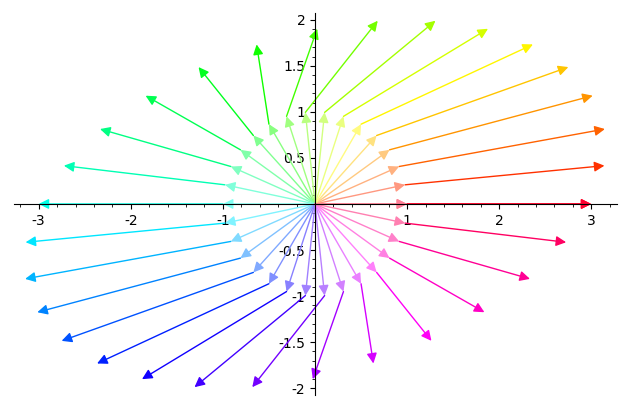

In [1]:
def basic_eigenpicture(A):
    V = [(Matrix([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]])*vector([1,0])) for theta in [0..2*pi, step = 2*pi/30]] 
    P1 = sum([arrow((0,0), (V[i]), aspect_ratio=1, width = 1, arrowsize=3, color = Color(rainbow(len(V))[i]).lighter(0.5)) for i in [0..len(V)-1]])
    P2 = sum([arrow((V[i]), ((A*V[i]) + V[i]), aspect_ratio=1, width=1, arrowsize=3, color=rainbow(len(V))[i]) for i in [0..len(V)-1]])
    return P1 + P2

basic_eigenpicture(Matrix([[2,1],[0,1]]))

Having defined `basic_eigenpicture`, we now wish to develop functions which will provide further insight into the structure of the matrix $A$, specifically with reference to its eigenvectors. To develop this picture, once again relying upon the plotting functionality of Sage, we define a function `show_eigenvectors` which, when given an inputted matrix $A \in Mat(2;\mathbb{R})$, will return a plot of its eigenvectors $\vec{\xi_{i}}$, normalised such that $||x_{i}|| = 1$, $\forall i \in \{1,2\}$. We are only interesting in plotting the real eigenvectors, so we implement an if statement which verifies that $\lambda_{i}$, the eigenvalues corresponding to the $\vec{\xi_{i}}$, are real-valued.

In addition to the unit-length eigenvectors, we plot $A\vec{\xi_{i}}$, the matrix $A$ applied through left multiplication to $\vec{\xi_{i}}$. As the $\vec{\xi_{i}}$ are eigenvectors of $A$, we note that $A\vec{\xi_{i}} = \lambda_{i}\vec{\xi_{i}}$, so these vectors should be parallel to $\vec{\xi_{i}}$, and be of length $\lambda_{i}$. Once more, we translate these vectors by $\vec{\xi_{i}}$.

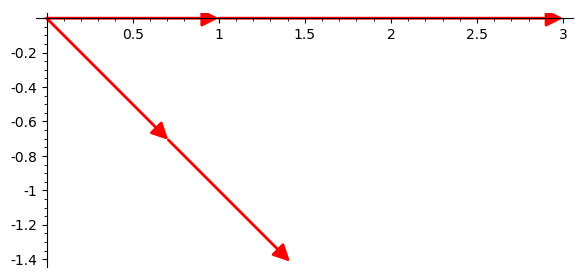

In [2]:
def show_eigenvectors(A):
    V1 = []
    if (A.eigenvectors_right()[0][2] == 1):
        V_eigval = [(A.eigenvectors_right()[i][0]) for i in [0..A.nrows()-1]]
        for i in range(len(V_eigval)):
            if V_eigval[i] in RR: #We are only considering real eigenvectors, and ergo real eigenvalues
                V1.append(A.eigenvectors_right()[i][1][0])
    else:
        if(len(A.eigenvectors_right()[0][1]) == 2):
            for i in range(2):
                V1.append(A.eigenvectors_right()[0][1][i])
        else:
            V_eigval = [A.eigenvectors_right()[0][0]]
            if V_eigval[0] in RR:
                V1.append(A.eigenvectors_right()[0][1][0])
    norm_V1 = [(1/sqrt(V1[i][0]^2 + V1[i][1]^2))*(V1[i]) for i in [0..len(V1) - 1]]
    P1 = sum([arrow((0,0), (norm_V1[i]), color=(1,0,0), aspect_ratio=1) for i in [0..len(norm_V1)-1]])
    P2 = sum([arrow((norm_V1[i]), ((A*norm_V1[i]) + norm_V1[i]), color=(1,0,0), aspect_ratio=1) for i in [0..len(norm_V1)-1]])
    return P1 + P2

show_eigenvectors(Matrix([[2,1],[0,1]]))

Next, we wish to consider the singlar value decomposition, or SVD, of the matrix $A$. This will be two vectors of the form $A\vec{v}$, where $\vec{v}$ is a unit vector as defined above, which have the largest and smallest magnitude respectively. Ergo, where $S:= \{\vec{v} \in \mathbb{R}^{2}: ||\vec{v}|| = 1\}$, we wish to determine the vectors $\vec{s_{1}} = \min\limits_{\vec{v} \in S}||A\vec{v}||$, and $\vec{s_{2}} = \max\limits_{\vec{v} \in S}||A\vec{v}||$. These vectors correspond to the eigenvectors of the matrix $A^{T}A$, and will be of magnitude $\sqrt{|\lambda_{s_{i}}|}$, where $\lambda_{s_{i}}$ are the eigenvalues of $A^{T}A$.

And thus, to determine these singular vectors, we write a function `show_svd` which, given a matrix $A$, will determine the real eigenvectors $\vec{s_{1}}$, $\vec{s_{2}}$ of $A^{T}A$ (which are precisely the singular vectors of the matrix), and plot them, in addition to $A\vec{s_{1}}$, $A\vec{s_{2}}$, both translated as prior by the unit vectors.

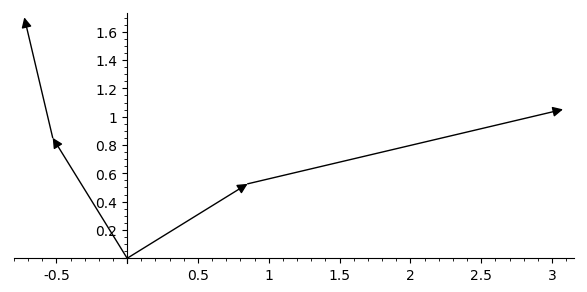

In [3]:
def show_svd(A):
    B = A.change_ring(RDF)
    Mat = B.transpose()*B
    V1 = []
    if (Mat.eigenvectors_right()[0][2] == 1):
        V_eigval = [(Mat.eigenvectors_right()[i][0]) for i in [0..A.nrows()-1]]
    else:
        if(len(Mat.eigenvectors_right()[0][1]) == 2):
            for i in range(2):
                V1.append(Mat.eigenvectors_right()[i][1][0])
        else:
            V_eigval = [Mat.eigenvectors_right()[0][0]]
    for i in range(len(V_eigval)):
        if V_eigval[i] in RR: #We are only considering real eigenvectors, and ergo real eigenvalues
            V1.append(Mat.eigenvectors_right()[i][1][0])
            if V1[i][1] <=0:
                V1[i] *= -1
        else:
            return()
    norm_V1 = [(1/sqrt(V1[i][0]^2 + V1[i][1]^2))*(V1[i]) for i in [0..len(V1) - 1]]
    P1 = sum([arrow((0,0), (norm_V1[i]), color=(0,0,0), aspect_ratio=1, width=1, arrowsize=3) for i in [0..len(norm_V1)-1]])
    P2 = sum([arrow((norm_V1[i]), ((A*norm_V1[i]) + norm_V1[i]), aspect_ratio=1, width=1, arrowsize=3, color=(0,0,0)) for i in [0..len(norm_V1)-1]])
    return P1 + P2

show_svd(Matrix([[2,1],[0,1]]))

Now, having equipped ourselves with the tools to built a considerably more thorough and informative eigenpicture of a matrix $A$, we write a function `eigenpicture` which combines our previous functions into one plot, adding (optionally) `show_eigenvectors` and `show_svd` to the graph generated by `basic_eigenpicture`.

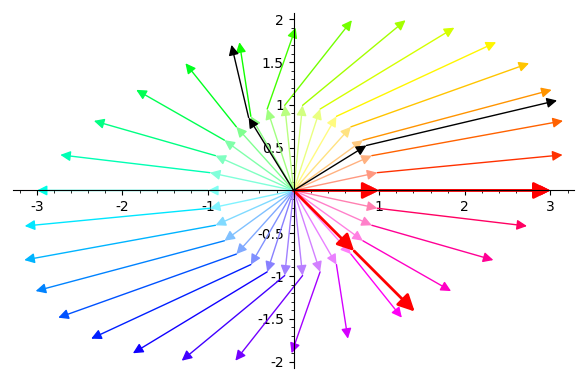

In [4]:
def eigenpicture(A, include_evecs = True, include_svd=True):
    P = basic_eigenpicture(A)
    if include_evecs:
        P += show_eigenvectors(A)
    if include_svd:
        P += show_svd(A)
    return P

eigenpicture(Matrix([[2,1],[0,1]]))

The complete picture gives us some clear insight into the structure of the matrix $A$. For instance, one can instantly deduce whether $A$ is invertible courtesy of `show_eigenvectors`. This is because, any invertible real matrix will have a full complement of eigenvectors, so a $2 \times 2$ matrix must have two eigenvectors if it is invertible. As such, any eigenpicture which contains only one eigenvector, corresponding to only one eigenvalue, is non-diagonalisable.

If the matrix $A$ is diagonal, then the eigenvectors produced by `show_eigenvectors` and the singular vectors produced by `show_svd` will be the same, up to a multiple of $-1$. This is because $A$ being diagonal implies that $A^{T} = A$, so the singular vectors are the eigenvectors of $A^{2}$, of length $\sqrt{|\lambda_{i}|}$, which will precisely be the eigenvectors of $A$.

Now, in order to verify that our `eigenfunction` function is operating as anticipated, we will run a variety of tests on it to ensure that the eigenpictures generated are as anticipated. Perhaps the most basic test we can conduct is to determine the length of time the function will take to generate an eigenpicture for a variety of randomly generated matrices. We will do so with a function `time_test` which will conduct $n$ time trials and return the mean time taken, using the `time` package, which counts the number of seconds since the Unix epoch, to do so. In order to avoid overburdening the kernel, we do this time test over the integer ring, meaning that $A_{ij} \in \mathbb{Z}$, $\forall i,j \in \{1,2\}$.

In [5]:
import time as time

def time_test(n):
    times_array = []
    for i in range(n):
        dummy_var = 0
        A = random_matrix(ZZ, 2, 2)
        t1 = time.time()
        dummy_var = eigenpicture(A)
        times_array.append(time.time() - t1)
    return (sum(times_array)/n)

n=10
time_mean = time_test(n)
print("The mean time taken to generate an eigenpicture, given " + str(n) + " trials is " + str(time_mean) + " seconds.")

The mean time taken to generate an eigenpicture, given 10 trials is 0.102179741859 seconds.


We additionally wish to consider the shape of the underlying set of vectors $\vec{v_{i}}$ and $A\vec{v_{i}}$ (that is, those generated by `basic_eigenpicture`), and determine why it, irrespective of our choice of a matrix, they appear to be elliptical - we must determine if this is always the case; if so, why? If not, under what circumstances is it?

We note that the vectors $A\vec{v_{i}}$, once translated by $\vec{v_{i}}$, will take the form:

$$(A\vec{v_{i}} + \vec{v_{i}}) = \begin{pmatrix}a_{11}\cos(\theta) + a_{12}\sin(\theta) + \cos(\theta)\\a_{21}\cos(\theta) + a_{22}\sin(\theta) + \sin(\theta)\end{pmatrix}$$for $\theta \in [0, 2\pi)$. To demonstrate that this is indeed the case, consider the following function `ellipse_vector`, which given a matrix $A$ and an angle $\theta$, will determine and return the value of vector defined above at said value of $\theta$ - using it, we can plot the line connecting the endpoints of these vectors, overlaid on the ellipse generated by `basic_eigenpicture` with $A = \begin{pmatrix}2&1\\0&1\end{pmatrix}$, our recurring example:

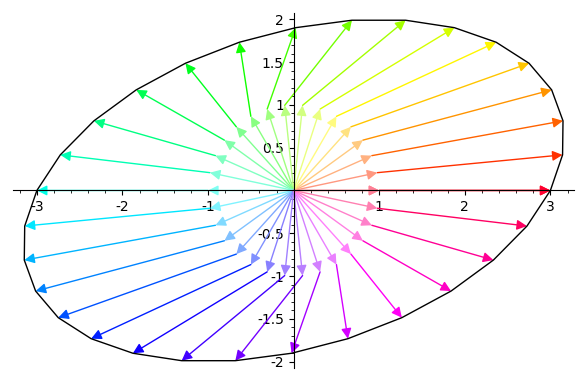

In [6]:
def ellipse_vector(A, theta): #We define a function which will return the vector defined above at various theta values
    return [(A[0][0]+1)*cos(theta) + A[0][1]*sin(theta), A[1][0]*cos(theta) + (A[1][1]+1)*sin(theta)]

A = Matrix(ZZ, [[2,1],[0,1]]) #We once more return to our sample matrix [[2,1],[0,1]]
vec = [ellipse_vector(A, theta) for theta in [0..2*pi, step=2*pi/30]] #and generate a list of the vectors

P1 = list_plot(vec, plotjoined=True, color=(0,0,0)) #We plot a path connecting the endpoints of the vectors in "vec"
P2 = basic_eigenpicture(A) #And overlay the basic_eigenpicture of the matrix A
P1 + P2

And thus, our problem has been reduced to determining when, for $\theta \in [0, 2\pi)$, $(A\vec{v_{i}} + \vec{v_{i}})=(A+I)\vec{v_{i}}=\begin{pmatrix}(a_{11} + 1)\cos(\theta) + a_{12}\sin(\theta)\\a_{21}\cos(\theta) + (a_{22} + 1)\sin(\theta)\end{pmatrix}$ defines an ellipse.

Singular value decomposition allows us to represent the matrix $M=(A+I)$ as $M=U\Sigma V^{T}$, where $U$ and $V^{T}$ are orthonormal matrices, hence they are rotations only. This leaves us with $\Sigma$ which is a diagonal matrix, hence it scales in the $x$ and $y$ directions only. Therefore the problem is reduced to finding when $\Sigma \vec{v_{i}}$ is an ellipse. Leaving us with
$$\Sigma \vec{v_{i}} = \begin{pmatrix}\sigma_{1} & 0 \\ 0 & \sigma_{2}\end{pmatrix}\begin{pmatrix}\cos(\theta) \\ \sin(\theta) \end{pmatrix} = \begin{pmatrix}\sigma_{1}\cos(\theta) \\  \sigma_{2}\sin(\theta)\end{pmatrix}$$
for $\theta \in [0, 2\pi)$, where $\sigma_{1}>\sigma_{2}$. Notice that $\Sigma \vec{v_{i}}$ satisfies the equation for horizontally aligned ellipses $\frac{(\alpha\cos(\theta))^{2}}{\alpha^{2}} + \frac{(\beta\sin(\theta))^{2}}{\beta^{2}} = 1$, if $\sigma_{1}=\alpha$ and $\sigma_{2}=\beta$.
Therefore the image must be an ellipse with semi-major and semi-minor axis equal to $\sigma_{1}$ and $\sigma_{2}$ respectively. They must all be centred at the origin and horizontally alligned. One can see from the equation of a circle $\cos(\theta)^{2} +\sin(\theta)^{2} = \sigma_{i}^{2}$, that the image will be a circle with radius $\sigma_{i}$ if and only if $\sigma_{1}=\sigma_{2}$.  

If one of $\sigma_{1}$ or $\sigma_{2}$ is $0$, then the transformation will obviuosly be a line segment of length $2\sigma_{1}$ centred at the origin, vertical or horizontal respectively. If both are $0$ then the image will be a point at the origin.

One useful property from singular value decomposition is that $\sigma_{i}=\sqrt{\lambda_{i}}$, where $\lambda_{i}$'s are the eigenvalues of $M^{T}M$ and are always real. Hence the images we get depend on these $\lambda_{i}$'s, this allows us to find what conditions must $M$ have in order to get each type of shape, and therefore the conditions of $A$ also. Since the $\lambda_{i}$'s are always real, the only images we can get are: ellipses, circles, line segements or circles. In general   

$$M^{T}M=\begin{pmatrix}m_{11} & m_{21}\\m_{12} & m_{22}\end{pmatrix}\begin{pmatrix}m_{11} & m_{12}\\m_{21} & m_{22}\end{pmatrix} = \begin{pmatrix}m_{11}^{2} + m_{21}^{2} & m_{11}m_{12} + m_{21}m_{22}\\m_{12}m_{11} + m_{22}m_{21} & m_{12}^{2} + m_{22}^{2}\end{pmatrix}$$

where $m_{11}=a_{11}+1$, $m_{12}=a_{12}$, $m_{21}=a_{21}$, and $m_{22}=a_{22}+1$. Now we need to find the eigenvalues, we can do this by solving $det(M^{T}M-\lambda I)=0$. For a point we know that both eigenvalues need to be $0$, this can only be obtained if $$A=\begin{pmatrix}-1 &0\\ 0& -1 \end{pmatrix}$$

In order to get a circle we know that both eigenvalues must be equal, we get that this only happens if:

$$((a_{11}+1)^{2} +(a_{22}+1)^{2}+a_{12}^{2}+a_{21}^{2})^{2}−4((a_{11}+1)^{2} (a_{22}+1)^2+a_{12}^{2} a_{21}^{2}−2(a_{11}+1)a_{12}a_{21}(a_{22}+1))=0$$ 

For line segments, we want only one eigenvalue equal to $0$, this only happens if:

$$(a_{11}+1)^2 (a_{22}+1)^2+a_{12}^2 a_{21}^2−2(a_{11}+1)a_{12}a_{21}(a_{22}+1)=0$$

If none of the above 3 conditions is met, the image will be an ellipse because the only other possible image left is an ellipse.

We use our `basic_eigenpicture` function on 4 matrices to verify that the conditions are correct.

[-1  0]
[ 0 -1]

Point


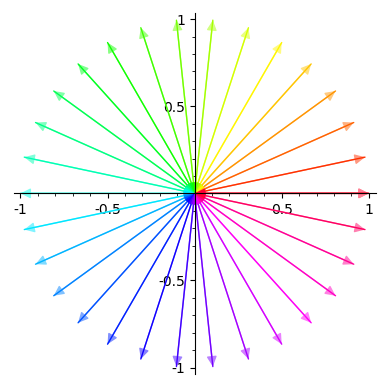

[ 0  1]
[-1  0]

Circle


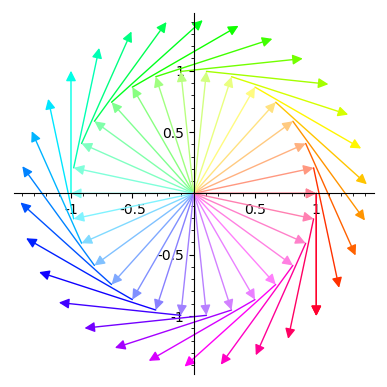

[0 1]
[1 0]

Line


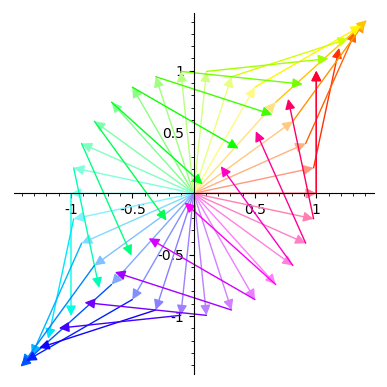

[1 1]
[1 1]

Ellipse


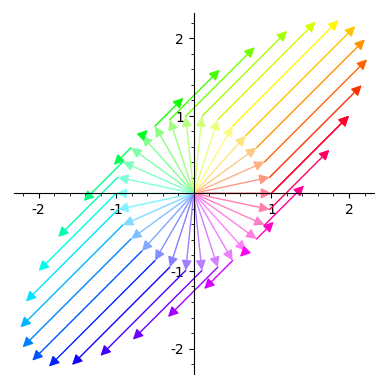

In [7]:
A0 = Matrix(ZZ, [[-1,0], [0,-1]])  # A matrix satisfying the conditions for the image to be a point
A1 = Matrix(ZZ, [[0,1], [-1,0]])  # A matrix satisfying the conditions for the image to be a line
A2 = Matrix(ZZ, [[0,1], [1,0]])  # A matrix satisfying the conditions for the image to be a circle
A3 = Matrix(ZZ, [[1,1], [1,1]])  # A matrix satisfying the conditions for the image to be an ellipse
matrix_examples=[A0, A1, A2, A3]
for i in matrix_examples:
    A=i
    pretty_print(i)
    a=A[0,0]
    b=A[0,1]
    c=A[1,0]
    d=A[1,1]
    M= Matrix(QQ, [[a+1,b],[c,d+1]])
    if a==-1 and b==0 and c==0 and d==-1: #If point conditions are met...
        print('Point') #...print "Point"
    elif ((a+1)^2)*((d+1)^2)+(c^2)*(b^2)-2*(a+1)*b*c*(d+1)==0: #If line conditions are met...
        print('Line') #...print "Line"
    elif ((a+1)^2+b^2+c^2+(d+1)^2)^2-4*(((a+1)^2)*((d+1)^2)+(c^2)*(b^2)-2*(a+1)*c*b*(d+1))==0: #If circle conditions are met...
        print('Circle') #...print "Circle"
    else: #otherwise... 
        print('Ellipse') #...print "Ellipse"
    
    basic_eigenpicture(A).show()

The angle of rotation of the image depends on $U$. Since $V^{T}$ is rotating a circle centred at the origin, it's not changing anything visually. $U$ is orthonormal, therefore without loss of generality we can define it as $U= \begin{pmatrix}\cos(\gamma)  & -\sin(\gamma)\\\sin(\gamma) & \cos(\gamma)\end{pmatrix}$. Where the anti-clockwise angle of rotation of the image will be $\gamma$. The eigenvectors $\vec{v_{i}}$ of $MM^{T}$ make up the columns of $U$, therefore to know the angle of rotation we must find the $\vec{v_{i}}$'s. We created a function `rotation_angle` which given a matrix A gives you the angle at which the ellipse or line is going to be and uses `basic_eigenpicture` to verify that the angle is correct.

Gamma = arcsin(0.2897841486884301?)


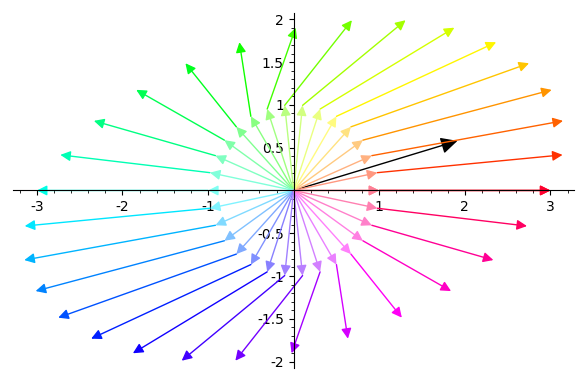

In [8]:
def rotation_angle(A):
    M = A + identity_matrix(2) # We define M=A+I 
    v_i = (M*M.transpose()).eigenvectors_right() #calculate the eigenvectors of MM^T
    a=A[0,0]
    b=A[0,1]
    c=A[1,0]
    d=A[1,1]
    P=basic_eigenpicture(A)
    if a==-1 and b==0 and c==0 and d==-1:
        print( "Point so rotation is not visible") #If image is a point then the rotation is not visible
    elif ((a+1)^2+b^2+c^2+(d+1)^2)^2-4*(((a+1)^2)*((d+1)^2)+(c^2)*(b^2)-2*(a+1)*c*b*(d+1))==0:
        print( "Circle so rotation is not visible") #If image is a circle then the rotation is not visible 
    elif (v_i[0][2] == 1):
        x1= v_i[0][1] #eigenvectors of MM^T
        x2= v_i[1][1] #''
        w1= x1[0]/sqrt(x1[0][0]^2+x1[0][1]^2) #normalize eigenvectors of MM^T
        w2= x2[0]/sqrt(x2[0][0]^2+x2[0][1]^2) #''
        if w1[0]==w2[1] and w1[1]==-w2[0]: 
            P =  arrow((0,0), (2*cos(arcsin(w1[0])),2*sin(arcsin(w1[0]))), color=(0,0,0), aspect_ratio=1, width=1, arrowsize=5) +P
            print 'Gamma =',arcsin(w1[0])
            return P
        else:
            P =  arrow((0,0), (2*cos(arcsin(-w1[0])),2*sin(arcsin(-w1[0]))), color=(0,0,0), aspect_ratio=1, width=1, arrowsize=5)+P
            print 'Gamma= ', arcsin(-w1[0])
            return P  
rotation_angle(Matrix([[2,1],[0,1]]))

We applied the `rotation_angle` function on the matrix $A = \begin{pmatrix}2&1\\0&1\end{pmatrix}$. One can observe from the picture generated above, that the angle is indeed correct.


We additionally wish to ponder <i>why</i> determining the eigenvectors of $A^{T}A$ will provide us with the singular value decomposition of a given $2 \times 2$ matrix. Poole's "Linear Algebra" gives some insight into doing so, and we can certainly fill a slide or two, in addition to several markdown boxes, elaborating on why this is the case.

In order to investigate the eigenvalues and related properties of various matrices, we use our `eigenpicture` function to generate a graph for various $2 \times 2$ matrices $A_{i}$, and compare and contrast them to see what we can deduce for matrices which have different properties, and classify them as appropriate.

The eigenpicture generated by the matrix is 


[0 0]
[0 0]

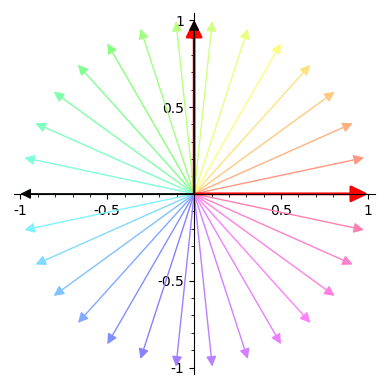

The eigenpicture generated by the matrix is 


[1 0]
[0 1]

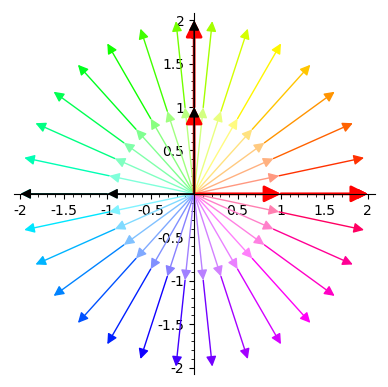

The eigenpicture generated by the matrix is 


[ 2  0]
[ 0 -3]

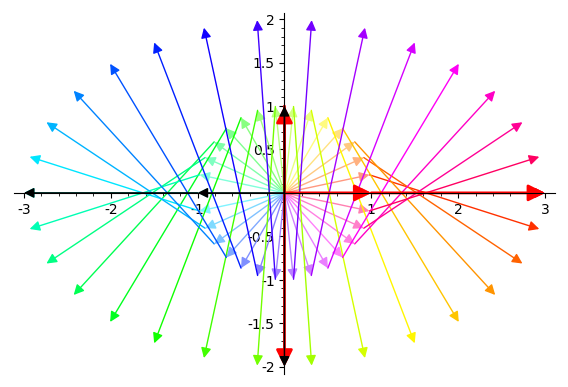

The eigenpicture generated by the matrix is 


[1 1]
[1 1]

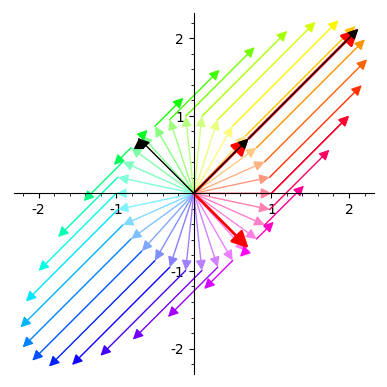

The eigenpicture generated by the matrix is 


[10 10]
[10 10]

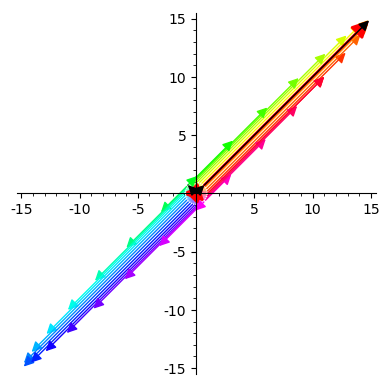

The eigenpicture generated by the matrix is 


[ 1/2  1/5]
[ 7/5 7/10]

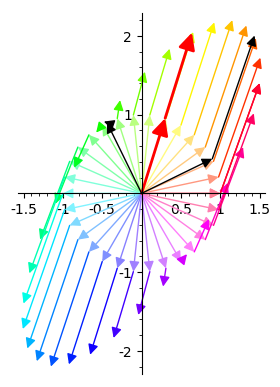

The eigenpicture generated by the matrix is 


[0 1]
[1 0]

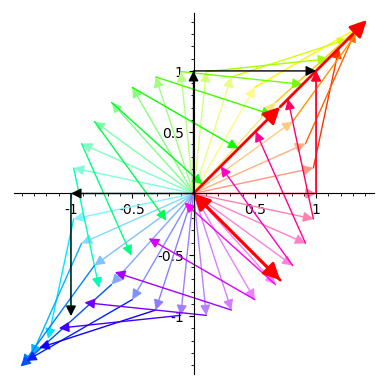

The eigenpicture generated by the matrix is 


[ 0  1]
[-1  0]

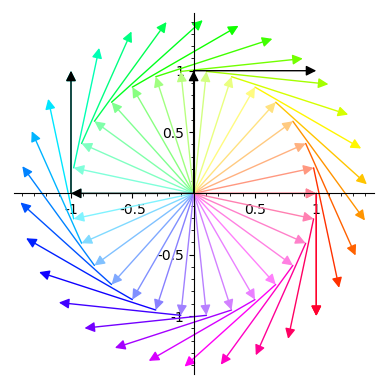

The eigenpicture generated by the matrix is 


[3 1]
[0 3]

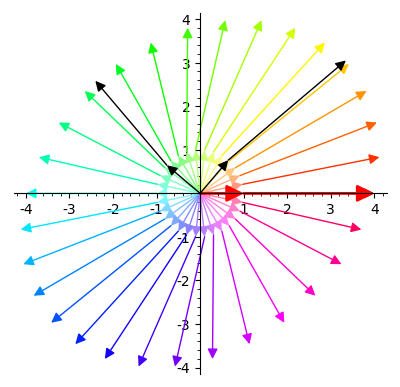

The eigenpicture generated by the matrix is 


[-1  1]
[-1  0]

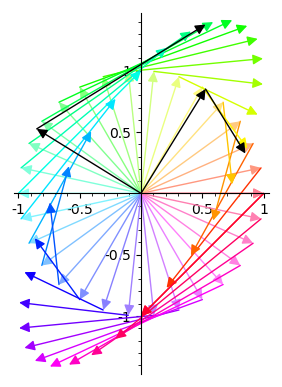

The eigenpicture generated by the matrix is 


[  0 100]
[  0 -10]

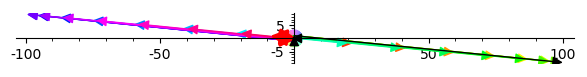

In [9]:
A0 = Matrix(ZZ, [[0,0], [0,0]])  # A zero matrix
A1 = Matrix(ZZ, [[1,0], [0,1]])  # The identity matrix, which has repeated eigenvalues, but unique eigenvectors
A2 = Matrix(ZZ, [[2,0], [0,-3]])  # A diagonal matrix with different entries
A3 = Matrix(ZZ, [[1,1], [1,1]])  # A matrix with 0 determinant, but two real eigenvalues
A4 = Matrix(ZZ, [[10,10], [10,10]]) # An integer multiple of the previous matrix
A5 = Matrix(QQ, [[1/2, 1/5], [7/5, 7/10]]) # A matrix which has non-integral coefficients 
A6 = Matrix(ZZ, [[0,1], [1,0]])  # A matrix which has two distinct eigenvalues
A7 = Matrix(ZZ, [[0,1], [-1,0]]) # A matrix which has no real eigenvalues
A8 = Matrix(ZZ, [[3,1], [0,3]])  # A matrix which has only one distinct eigenvector
A9 = Matrix(ZZ, [[-1,1], [-1,0]]) # A matrix with no real eigenvalues
A10 = Matrix(ZZ, [[0, 100], [0,-10]]) # A matrix which has large coefficients

Matrix_Array = [A0, A1, A2, A3, A4, A5, A6, A7, A8, A9, A10]
for i in range(len(Matrix_Array)):
    print("The eigenpicture generated by the matrix is ") 
    pretty_print(Matrix_Array[i])
    eigenpicture(Matrix_Array[i]).show()

We further might consider precisely why the singular vectors $\vec{s_{i}}$ of the matrix $A$ correspond to the eigenvectors of $A^{T}A$ - the reason is a consequence of the singular value decomposition of the matrix, as elaborated upon here. we beign by noting that, given a $2\times 2$ matrix $A$, $A^{T}A$ will be symmetric, as it will take the form $$\begin{pmatrix}a_{11}^{2} + a_{21}^{2} & a_{11}a_{12} + a_{21}a_{22}\\a_{12}a_{11} + a_{22}a_{21} & a_{12}^{2} + a_{22}^{2}\end{pmatrix}$$
Consequently, the Spectral Theorem tells us that $A^{T}A$ is orthogonally diagonalisable. The eigenvalues of the matrix are non-negative ($\lambda \geq 0$), so we can consider $\sigma_{i}$, the matrix's singular values, as $\sigma_{i} = \sqrt{\lambda_{i}}$.

Given $\vec{v_{i}}$, a unit-length eigenvector of $A^{T}A$, we note that $||A\vec{v_{i}}||^{2} = (A\vec{v_{i}})\cdot(A\vec{v_{i}}) = (A\vec{v_{i}})^{T}(A\vec{v_{i}}) = \vec{v_{i}}^{T}A^{T}A\vec{v_{i}} = \vec{v_{i}}^{T}\lambda\vec{v_{i}}$, as it is an eigenvector. Thus, we have, given that $\vec{v_{i}}$ is of unit-length, $||A\vec{v_{i}}||^{2} = \lambda_{i} \implies ||A\vec{v_{i}}|| = \sigma_{i}$, meaning that the singular values are the lengths of $A\vec{v_{i}}$, and the eigenvalues are the squares of these lengths.

By the singular value decomposition theorem, we can write, for $U = [\frac{A\vec{v_{1}}}{\sigma_{1}}|\frac{A\vec{v_{2}}}{\sigma_{2}}]$, $\Sigma = \begin{pmatrix}\sigma_{1} & 0\\0 & \sigma_{2}\end{pmatrix}$, $V = [\vec{v_{1}}|\vec{v_{2}}]$, that $A = U\Sigma V^{T}$. We wish to find $\vec{s_{2}} = \max\limits_{\vec{v} \in S}||A\vec{v}||$, where $S$ is the set of unit vectors. Thus, we have $\max\limits_{\vec{v} \in S}||A\vec{v}|| = \max\limits_{\vec{v} \in S}||U\Sigma V^{T}\vec{v}||$. We note that, since $U = [\frac{A\vec{v_{1}}}{\sigma_{1}}|\frac{A\vec{v_{2}}}{\sigma_{2}}]$, 

$$U^{T}U = \begin{pmatrix}\frac{A\vec{v_{1}}_{1}^{2}}{\sigma_{1}^{2}} + \frac{A\vec{v_{1}}_{2}^{2}}{\sigma_{1}^{2}} & \frac{A\vec{v_{1}}_{1}A\vec{v_{2}}_{1}}{\sigma_{1}\sigma_{2}} + \frac{A\vec{v_{1}}_{2}A\vec{v_{2}}_{2}}{\sigma_{1}\sigma_{2}}
\\\frac{A\vec{v_{1}}_{1}A\vec{v_{2}}_{1}}{\sigma_{1}\sigma_{2}} + \frac{A\vec{v_{1}}_{2}A\vec{v_{2}}_{2}}{\sigma_{1}\sigma_{2}} & \frac{A\vec{v_{2}}_{1}^{2}}{\sigma_{2}^{2}} + \frac{A\vec{v_{2}}_{2}^{2}}{\sigma_{2}^{2}}\end{pmatrix}$$ and as the matrix $U$ is orthogonal, and has been normalised, this equals $I$, and so $\max\limits_{\vec{v} \in S}||U\Sigma V\vec{v}|| = \max\limits_{\vec{v} \in S}||\Sigma V^{T}\vec{v}||$, as $||U\vec{x}|| = ||\vec{x}||$. Consequently, we can write $\vec{y}=V^{T}\vec{v}$, which by the same argument applied to $U^{T}U$ above has norm $||\vec{v}|| = 1$, and now consider $\max\limits_{\vec{v} \in S}||\Sigma\vec{y}||$, which will be satisied by the eigenvector of $A^{T}A$, which will have a norm of $\sigma_{i}$. By the same argument, the minimal expanded vector is given by the other eigenvector of $A^{T}A$.

We wish to consider the situations in which the singular vectors $s_{1}$ and $s_{2}$ of a $n \times n$ matrix $A$ are the same as the eigenvectors $\xi_{1}$ and $\xi_{2}$ of the matrix. We note that, per our previous deduction, the singular vectors are in fact the eigenvectors of the matrix $A^{T}A$, so we wish to find where:
$$\begin{pmatrix}a_{11} & a_{12}\\a_{21} & a_{22}\end{pmatrix}= \begin{pmatrix}a_{11} & a_{21}\\a_{12} & a_{22}\end{pmatrix}\begin{pmatrix}a_{11} & a_{12}\\a_{21} & a_{22}\end{pmatrix} = \begin{pmatrix}a_{11}^{2} + a_{21}^{2} & a_{11}a_{12} + a_{21}a_{22}\\a_{12}a_{11} + a_{22}a_{21} & a_{12}^{2} + a_{22}^{2}\end{pmatrix}$$will produce the same eigenvectors. As such, we must consider the case where $A$ and $\Sigma$ have the same eigenvalues (as the singular vectors are expanded by the singular value $\sigma_{i}$, while the $\xi_{i}$ are expanded by $|\lambda_{i}|$, the absolute value of the eigenvalues). Matrices with the same eigenvalues are <b>conjugate</b>, meaning that they must have the same trace. As such, we require that $|a_{11}| + |a_{22}| = \sigma_{1} + \sigma_{2}$. This is clearly the case for diagonal matrices, as well as for matrices of the form $\begin{pmatrix}c&c\\c&c\end{pmatrix}$. We could alternatively examine the determinant, which is also a shared property of conjugate matrices, implying that $$|a_{11}a_{22}| - |a_{12}a_{21}| = \sigma_{1}\sigma_{2}$$

One final idea, related to the singular value decomposition, which we could investigate integrates both the shape of the $A\vec{v_{i}} + \vec{v_{i}}$ and the singular vectors - under which circumstances do the singular vectors of the matrix form the major and minor axes of the corresponding ellipse. The answer, as intuition would dictate, is whenever the $A\vec{v_{i}} + \vec{v_{i}}$ are elliptical or form a circle, because the singular vectors $s_{i}$, owing to their origin in orthogonal matrices, are orthogonal - $\vec{s_{1}} \perp \vec{s_{2}}$, and $A\vec{s_{1}}$, $A\vec{s_{2}}$ are the largest and smallest vectors in the $A\vec{v_{i}}$, meaning that they form the axes. This can be seen in the example below, once again run using $A = \begin{pmatrix}2&1\\0&1\end{pmatrix}$.

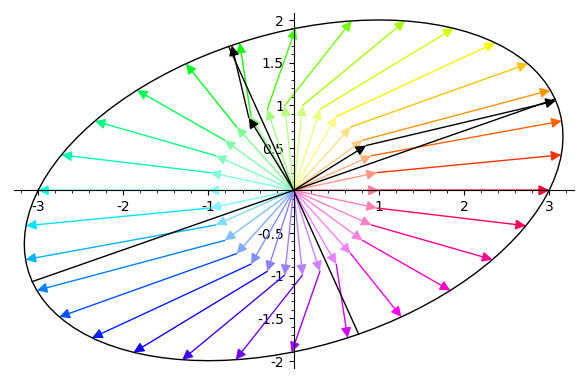

In [10]:
def ellipse_vector(A, theta): #We define a function which will return the vector defined above at various theta values
    return [(A[0][0]+1)*cos(theta) + A[0][1]*sin(theta), A[1][0]*cos(theta) + (A[1][1]+1)*sin(theta)]

A = Matrix(ZZ, [[2,1],[0,1]]) #We once more return to our sample matrix [[2,1],[0,1]]
vec = [ellipse_vector(A, theta) for theta in [0..2*pi, step=2*pi/100]] #and generate a list of the vectors

P1 = list_plot(vec, plotjoined=True, color=(0,0,0)) #We plot a path connecting the endpoints of the vectors in "vec"
P2 = eigenpicture(A, include_evecs=False) #And overlay the basic_eigenpicture of the matrix A
P3 = line([(vec[9]), (vec[59])], color=(0,0,0))
P4 = line([(vec[34]), (vec[84])], color=(0,0,0))
P1 + P2 + P3 + P4